# **Trabalho \#2**: Álgebra Linear MO431A
Universidade Estadual de Campinas (UNICAMP), Instituto de Computação (IC)

Prof. Jacques Wainer, 2021s1

In [1]:
print('225293: ' + 'Elias Batista Ferreira')
print('225242: ' + 'Maurício Pereira Lopes')
print('211518: ' + 'Stephane de Freitas Schwarz')

225293: Elias Batista Ferreira
225242: Maurício Pereira Lopes
211518: Stephane de Freitas Schwarz


### 1 implementação de descida do gradiente com gradiente explicito

#### Minimizar a função de 2 dimensões abaixo:

$f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2$

#### As derivadas parciais da função f(x1, x2) data são:

$\frac{d}{dx_1} f(x_1, x_2) = 2(200x_1^3 - 200x_1x_2 + x_1 - 1)$


$\frac{d}{dx_2} f(x_1, x_2) = 200(x_2 - x_1^2)$

In [2]:
# carregar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

Nesse trabalho implementamos um método de otimização, baseando-se na descida do gradiente. Para isso, o algoritmo leva em consideração a função de Rosenbrock dada.

O pipeline geral do método desenvolvido pode ser descrito como:

> Dado uma entrada x qualquer, calculamos os respectivos gradientes, baseado na função supramencionada, e atualizamos seus valres de acordo com a taxa de aprendizagem adotada.
> 
> Para cada passo, verificamos se houve uma melhora significativamente suficiente para repetimos o processo, essa melhora é avaliada pela tolerância.

Abaixo descrevemos mais detalhes da implementação e análise dos resultados.

In [3]:
# definição da função f(x1, x2)
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2

# f = lambda x1, x2: (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2

In [4]:
# função para o cálculo do gradiente de f(x1, x2) dada
def gradient(x):
    df_dx1 = 2 * (200 * np.power(x[0], 3) - 200 * x[0] * x[1] + x[0] - 1)
    df_dx2 = 200 * (x[1] - np.power(x[0], 2))
    gradient = np.array([df_dx1, df_dx2])
    return gradient

In [5]:
# função para otimizar a função através do gradient descent
def otimiza(x, tol, passos, lr, reducao_lr = 1):
    for p in range(passos):
        x_old = x[-1]
        x_new = (x_old - lr * gradient(x_old))
        if np.linalg.norm(f(x_new) - f(x_old)) < tol:
            break
        x = np.append(x, x_new.reshape(1, 2), axis = 0)
        lr = lr * reducao_lr
    return x, p

In [6]:
# função para calcular e gerar os gráficos do gradient descent para cada learning rate
def calcular(x1, x2, tol, passos, lr, reducao_lr = 1):
    # define o ponto inicial x de coordenadas (x1, x2)
    x = (np.array([x1, x2])).reshape(1, 2)
    pontos, p = otimiza(x, tol, passos, lr, reducao_lr)

    print("Learning Rate de:", lr)
    print("Convergiu em", p, "passos.")
    print("Último ponto x encontrado:", pontos[-1])

    
    # cálculo de f(x) em todos os pontos x da descida do gradiente
    res = np.empty((pontos.shape[0],1))
    for i in range(pontos.shape[0]):
        res[i] = f(pontos[i, :])
    print("Valor de f(x1, x2) no último ponto:", res[p])
        
    # valores de f(x1, x2) para cada passo
    print("\nA- Valores de f(x1,x2) a cada passo do gradient descent:")
    fig = plt.figure(figsize = [10, 10])
    plt.grid()
    plt.plot(res)
    plt.show()
    
    # ponto de mínima e limites dos gráficos
    minima = np.array([1, 1])
    minima_ = minima.reshape(-1, 1)
    x1_min, x1_max, x1_step = -1, 1.5, .2
    x2_min, x2_max, x2_step = -1, 1.5, .2
    
    # trajetória do gradient descent em 3 dimensões
    print("\n\nB - Gráfico adicional que mostra a trajetória da descida do gradiente")
    print("partindo do ponto inicial em direção ao ponto de mínimo em [1, 1, 0]")
    print("em 3 dimensões:")
    fig = plt.figure(figsize = [10, 10])
    ax = plt.axes(projection='3d')
    ax.plot3D(pontos[:, 0], pontos[:, 1], res[:, 0])
    ax.view_init(55, -45)
    ax.set_xlim((x1_min, x1_max))
    ax.set_ylim((x2_min, x2_max))
    plt.show()
    
    # superfície de f(x1, x2) com a trajetória do gradient descent
    print("\n\nC - Superfície da função f(x1, x2) com a trajetória do gradient descent")
    print("em direção ao ponto de mínimo.")
    fig = plt.figure(figsize = [10, 10])
    ax = plt.axes(projection='3d')
    w = np.outer(np.linspace(x1_min, x1_max, 30), np.ones(30))
    y = w.copy().T
    z = f([w, y])
    ax.plot3D(pontos[:, 0], pontos[:, 1], res[:, 0], c = "black")
    ax.plot_surface(w, y, z, norm = LogNorm(), rstride = 1, cstride = 1, edgecolor = 'none',
                    alpha=.8, cmap = plt.cm.jet)
    ax.plot(*minima_, f(minima), 'r*', markersize = 10)
    ax.view_init(55, -45)
    ax.set_xlim((x1_min, x1_max))
    ax.set_ylim((x2_min, x2_max))
    plt.show()
    
    # curvas de nível de f(x1, x2) com atrajetória do gradient descent
    print("\n\nD - Curvas de nível de f(x1, x2) com a trajetória do gradient descent")
    print("em direção ao ponto de mínimo.")
    # criar mesh grid de x1 e x2
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max + x1_step, x1_step), np.arange(x2_min, x2_max + x2_step, x2_step))
    # calcular f(x1, x2)
    z = f([x1, x2])

    # plot do gráfico
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contour(x1, x2, z, levels = np.logspace(-1, 4, 30), norm=LogNorm(), cmap=plt.cm.jet)
    ax.plot(*minima_, 'r*', markersize=18)
    plt.plot(pontos[:, 0], pontos[:, 1], c = "red")
    ax.set_xlabel('$x1$')
    ax.set_ylabel('$x2$')
    ax.set_xlim((x1_min, x1_max))
    ax.set_ylim((x2_min, x2_max))
    plt.show()

In [7]:
# valores iniciais de x1 e x2
x1 = 0
x2 = 0
# define o ponto inicial x de coordenadas (x1, x2)
x = (np.array([x1, x2])).reshape(1, 2)

# tolerância
tol = 0.00001

# máximo de passos
passos = 50000

### 1.1 use l.r = 1.e-3
---
Inicialmente executamos o algoritmo usando uma taxa de aprendizagem igual a 0.001. A convergência foi obtida depois do passo 3094. 

No gráfico (A) da função é possível observar que a aprendizagem do modelo foi muito mais lenta depois da iteração 1500. Essa característica sugere que, quanto mais próximo do mínimo local ou global, mais devagar é a melhora do modelo.

Três gráficos adicionais foram plotados mostrando:
>B- Trajetória da descida do gradiente partindo do ponto inicial e indo em direção ao ponto de mínimo. Nota-se que esse ponto não é alcançado pois atingiu o valor da tolerância muito cedo.
>
>C- Gráfico da superfície em 3D da função f(x1, x2) mostrando a região em torno do ponto de mínimo na cor azul. Sobre a superfícia está plotado o trajeto da descida do gradiente partindo do ponto inicial e se aproximando do ponto de mínimo.
>
>D - Gráfico em 2D com as curvas de nível da função f(x1, x2) e com a trajetória da descida do gradiente em direção ao ponto de mínimo. Aqui também fica claro que o ponto de mínimo não foi alcançado devido o valor da tolerância.

Learning Rate de: 0.001
Convergiu em 3095 passos.
Último ponto x encontrado: [0.89731737 0.8047416 ]
Valor de f(x1, x2) no último ponto: [0.01056281]

A- Valores de f(x1,x2) a cada passo do gradient descent:


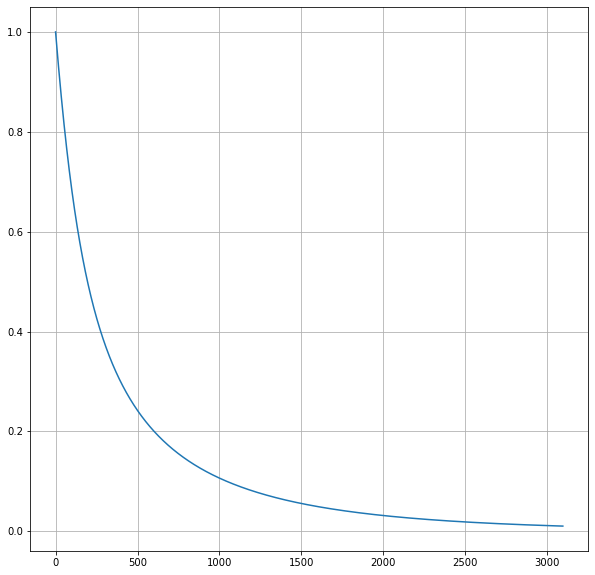



B - Gráfico adicional que mostra a trajetória da descida do gradiente
partindo do ponto inicial em direção ao ponto de mínimo em [1, 1, 0]
em 3 dimensões:


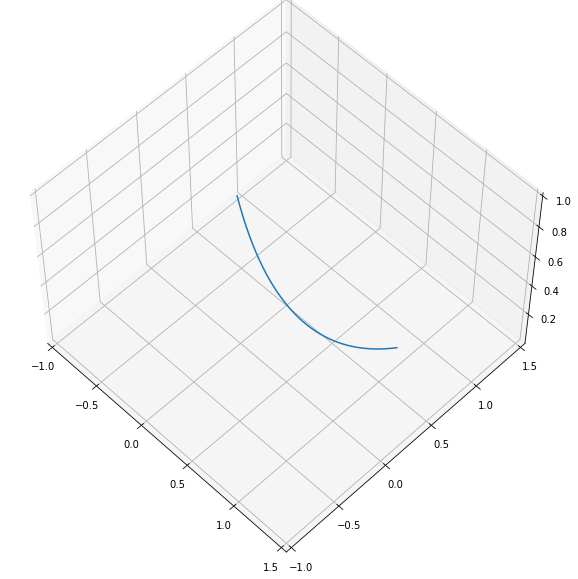



C - Superfície da função f(x1, x2) com a trajetória do gradient descent
em direção ao ponto de mínimo.


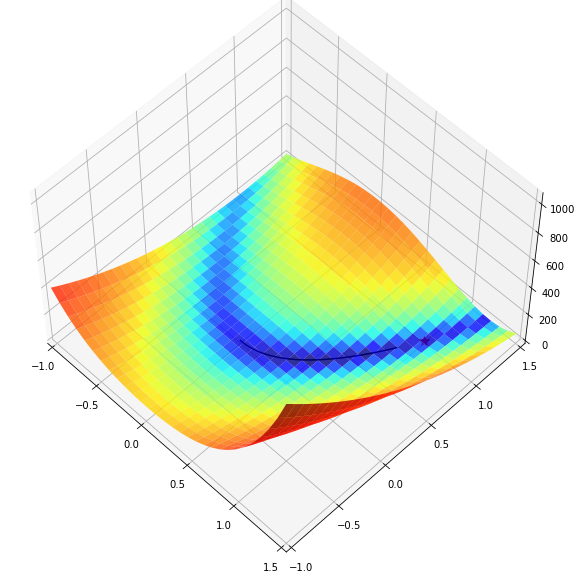



D - Curvas de nível de f(x1, x2) com a trajetória do gradient descent
em direção ao ponto de mínimo.


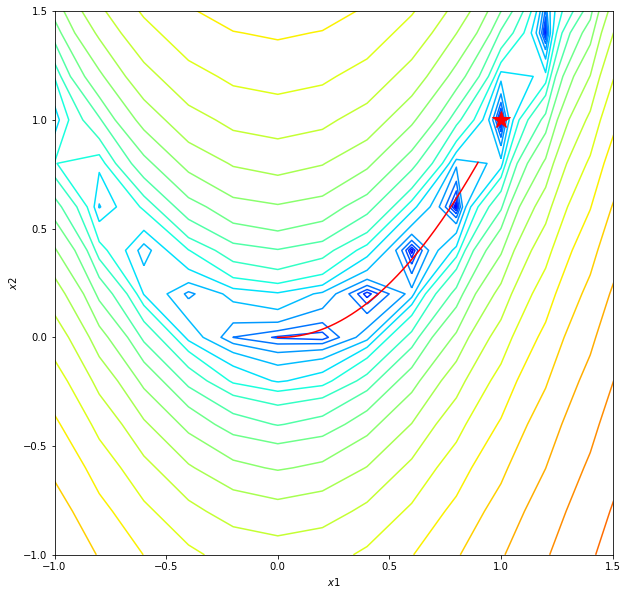

In [8]:
# learning rate
lr = 0.001
calcular(x1, x2, tol, passos, lr)

### 1.2 use l.r = 1.e-4
---

No gráfico (A) abaixo, percebe-se que diminuindo a taxa de aprendizagem a convergência é significativamente mais lenta. Isso ocorre porque as atualizações são sutis ao longo das iterações.

Sobre os três gráficos adicionais:
>B- Trajetória da descida do gradiente partindo do ponto inicial e indo em direção ao ponto de mínimo. Nota-se que o ponto de mínimo ficou ainda mais distante após a diminuição do learning rate.
>
>C- Gráfico da superfície em 3D da função f(x1, x2) mostrando a região em torno do ponto de mínimo na cor azul. Sobre a superfícia está plotado o trajeto da descida do gradiente partindo do ponto inicial e se aproximando do ponto de mínimo.
>
>D - Gráfico em 2D com as curvas de nível da função f(x1, x2) e com a trajetória da descida do gradiente em direção ao ponto de mínimo. Aqui também fica claro que o ponto de mínimo ficou ainda mais distante do que foi alcançado pela descida do gradiente.

Learning Rate de: 0.0001
Convergiu em 12383 passos.
Último ponto x encontrado: [0.72223396 0.5203204 ]
Valor de f(x1, x2) no último ponto: [0.07732336]

A- Valores de f(x1,x2) a cada passo do gradient descent:


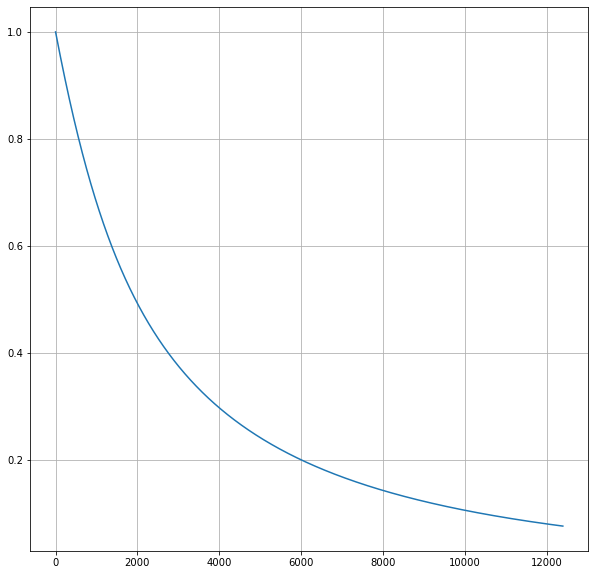



B - Gráfico adicional que mostra a trajetória da descida do gradiente
partindo do ponto inicial em direção ao ponto de mínimo em [1, 1, 0]
em 3 dimensões:


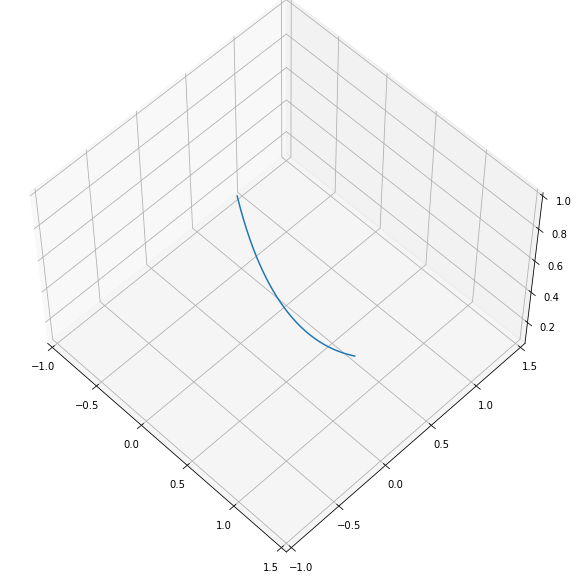



C - Superfície da função f(x1, x2) com a trajetória do gradient descent
em direção ao ponto de mínimo.


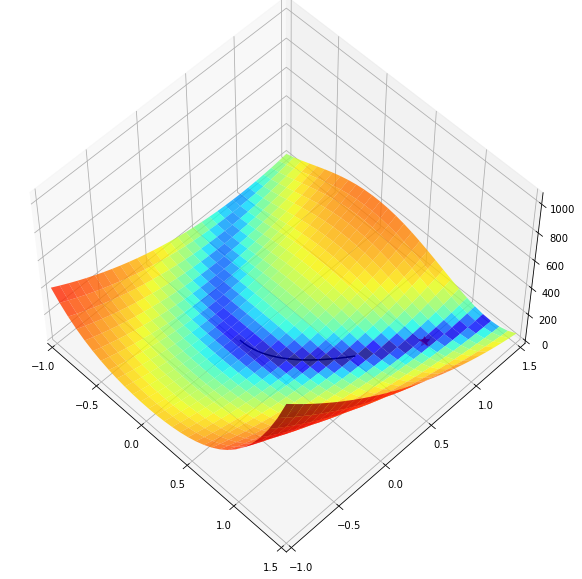



D - Curvas de nível de f(x1, x2) com a trajetória do gradient descent
em direção ao ponto de mínimo.


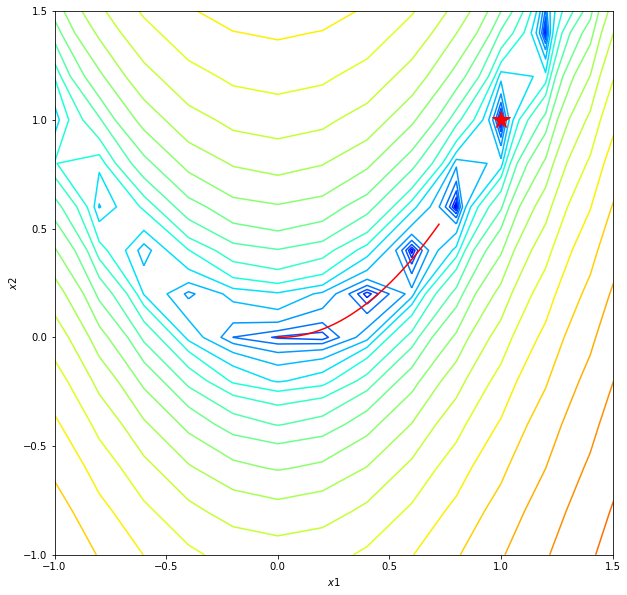

In [9]:
# learning rate
lr = 0.0001
calcular(x1, x2, tol, passos, lr)

### 1.3 l.r grande
---
Um dos dilemas mais complexos de resolver é como configurar eficientemente a taxa de aprendizagem do modelo.

Anteriormente vimos que adotando uma taxa de aprendizagem maior, a convergência é alcançada mais rapidamente. No entanto, há um limite para aumentar tal valor.

Nesse experimento, usamos uma taxa de aprendizagem igual a 0.02, porém, não houve convergência. Em outras palavras, deixando a taxa de aprendizagem muito grande o mínimo local ou global é extrapolado, ocasionando na falha do algoritmo.

Todos os gráficos, A, B, C e D mostram que a descida do gradiente com um learning rate muito alto deu um overflow e não atingiu nenhum mínimo da função.

Learning Rate de: 0.02
Convergiu em 49999 passos.
Último ponto x encontrado: [nan nan]
Valor de f(x1, x2) no último ponto: [nan]

A- Valores de f(x1,x2) a cada passo do gradient descent:


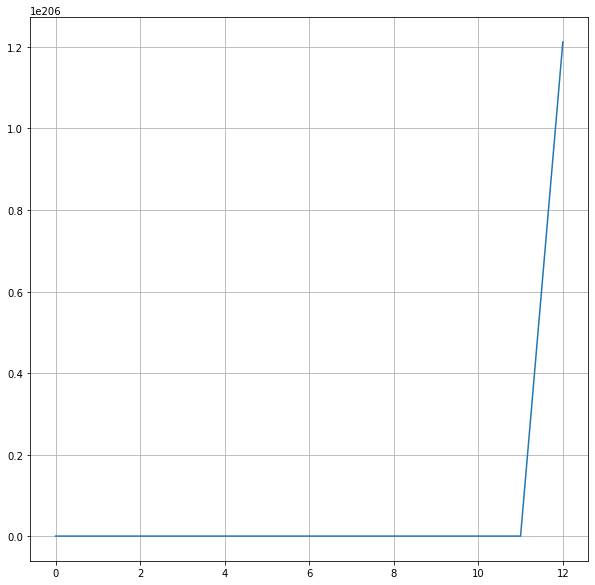



B - Gráfico adicional que mostra a trajetória da descida do gradiente
partindo do ponto inicial em direção ao ponto de mínimo em [1, 1, 0]
em 3 dimensões:


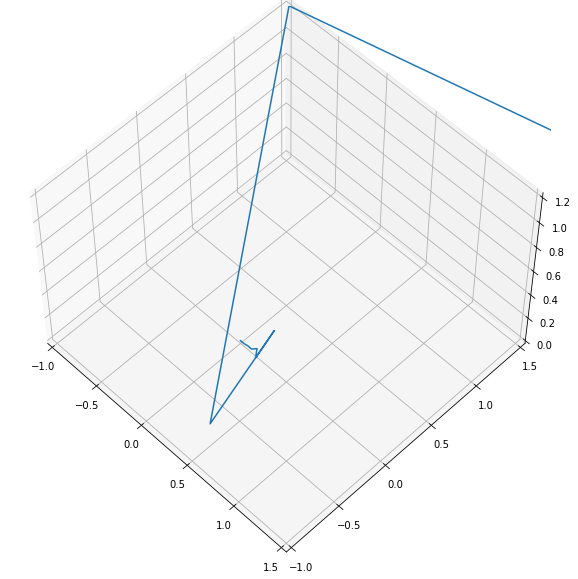



C - Superfície da função f(x1, x2) com a trajetória do gradient descent
em direção ao ponto de mínimo.


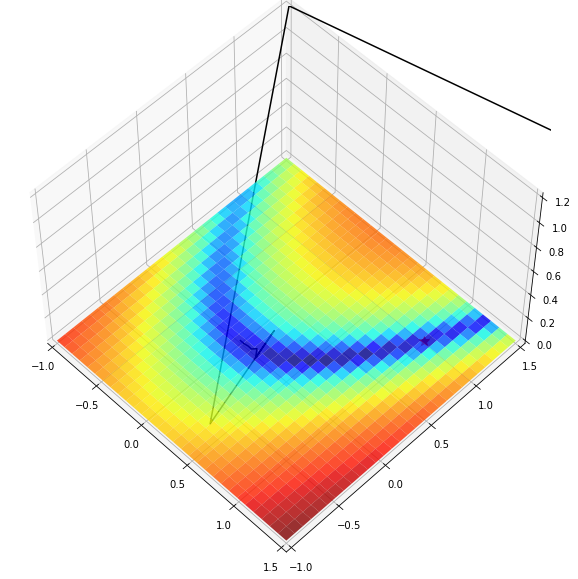



D - Curvas de nível de f(x1, x2) com a trajetória do gradient descent
em direção ao ponto de mínimo.


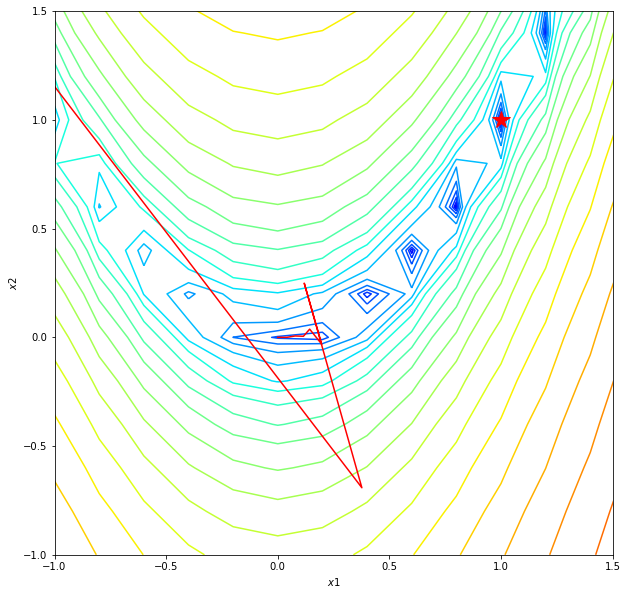

In [10]:
# learning rate de 1e-2
lr = 0.02
calcular(x1, x2, tol, passos, lr)

### 1.4 politica de redução do l.r
---

No experimento abaixo executamos a melhor configuração encontrada anteriormente usando uma política de redução da taxa de aprendizagem.

Essa abordagem possibilitou uma convergência mais rápida, economizando mais de 200 passos com um boa aproximação do ponto de mínimo.

Learning Rate de: 0.005
Convergiu em 1467 passos.
Último ponto x encontrado: [0.90380234 0.81645096]
Valor de f(x1, x2) no último ponto: [0.00927061]

A- Valores de f(x1,x2) a cada passo do gradient descent:


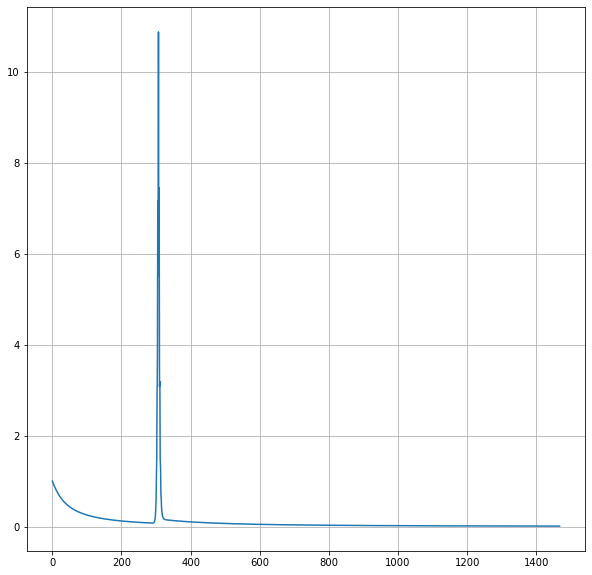



B - Gráfico adicional que mostra a trajetória da descida do gradiente
partindo do ponto inicial em direção ao ponto de mínimo em [1, 1, 0]
em 3 dimensões:


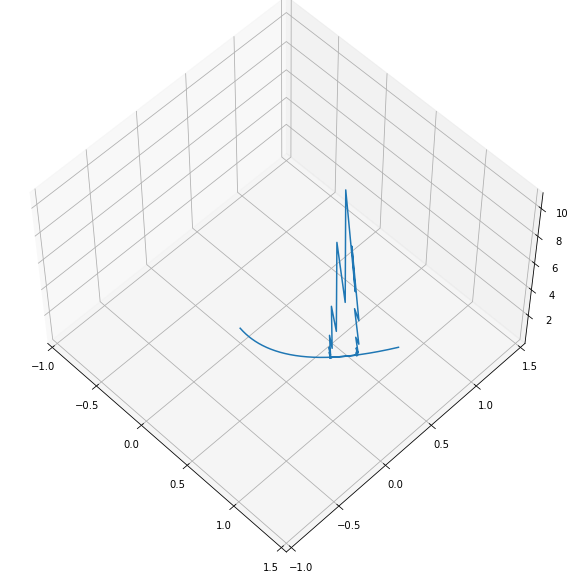



C - Superfície da função f(x1, x2) com a trajetória do gradient descent
em direção ao ponto de mínimo.


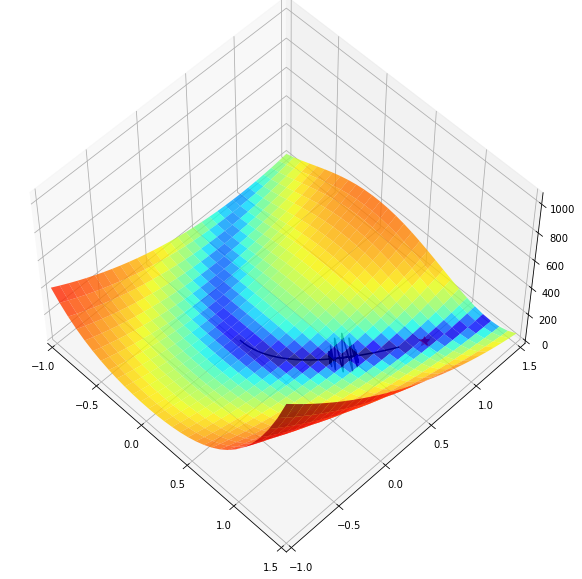



D - Curvas de nível de f(x1, x2) com a trajetória do gradient descent
em direção ao ponto de mínimo.


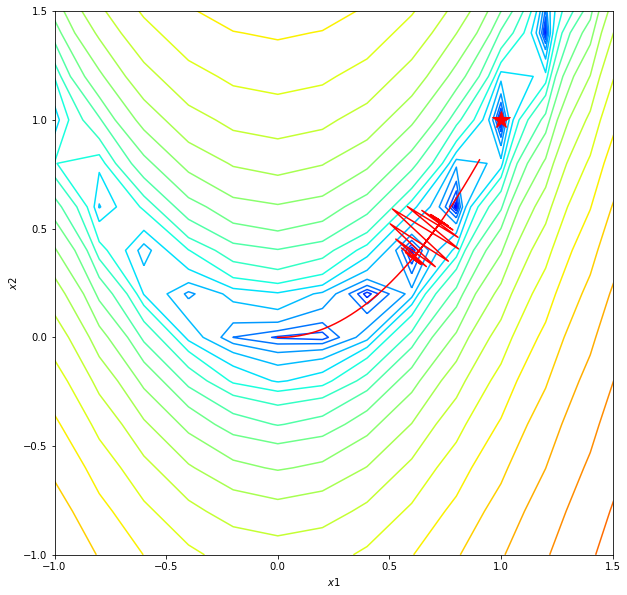

In [11]:
# learning rate de 1e-2
lr = 0.005
# taxa de redução do learning rate
reducao_lr = 0.999
calcular(x1, x2, tol, passos, lr, reducao_lr)

### 2 usando do tensorflow para calcular o gradiente
---

Por fim, usando a melhor configuração experimental (learning rate de 0.001), usamos o tensorflow para calcular o gradiente da função.

Os resultados angariados foram equivalentes.

In [12]:
import tensorflow as tf

In [13]:
# função para o cálculo do gradiente da função f(x1, x2) dada
def gradient(x):
    x1 = tf.Variable(float(x[0]))
    x2 = tf.Variable(float(x[1]))
    with tf.GradientTape() as tape:
        f = (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2
        [df_dx1, df_dx2] = tape.gradient(f, [x1, x2])

    return np.array([df_dx1.numpy(), df_dx2.numpy()])

Learning Rate de: 0.001
Convergiu em 3095 passos.
Último ponto x encontrado: [0.89731735 0.80474162]
Valor de f(x1, x2) no último ponto: [0.01056281]

A- Valores de f(x1,x2) a cada passo do gradient descent:


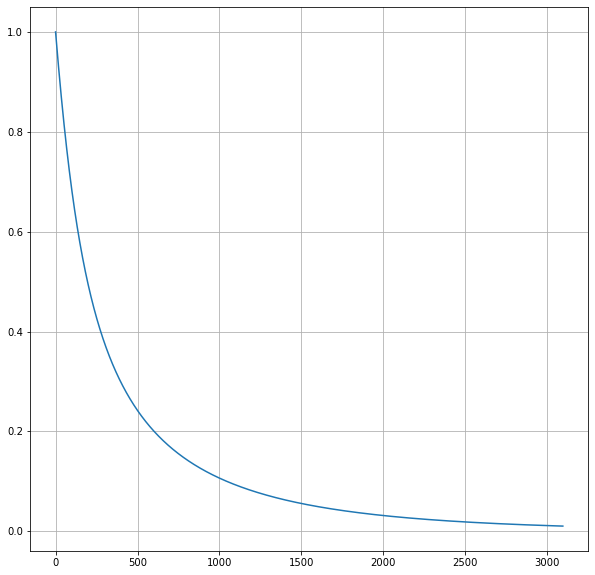



B - Gráfico adicional que mostra a trajetória da descida do gradiente
partindo do ponto inicial em direção ao ponto de mínimo em [1, 1, 0]
em 3 dimensões:


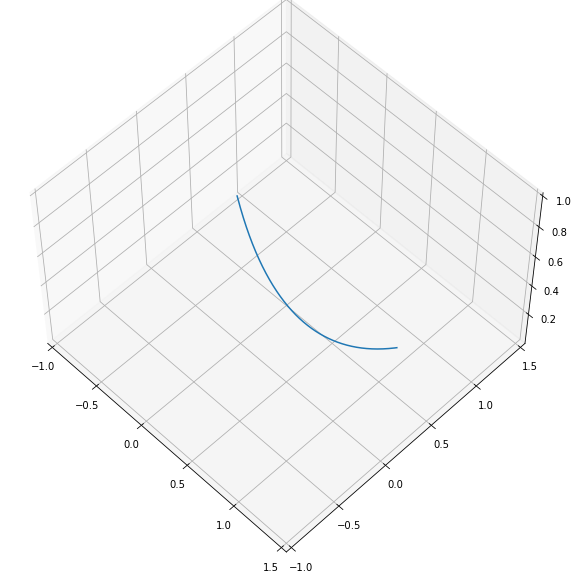



C - Superfície da função f(x1, x2) com a trajetória do gradient descent
em direção ao ponto de mínimo.


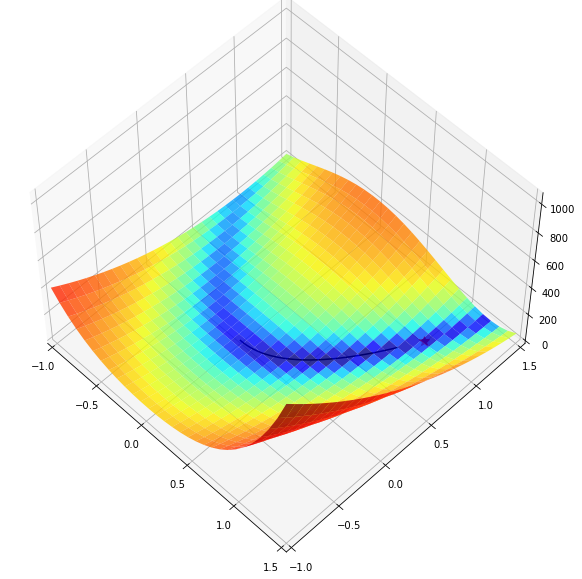



D - Curvas de nível de f(x1, x2) com a trajetória do gradient descent
em direção ao ponto de mínimo.


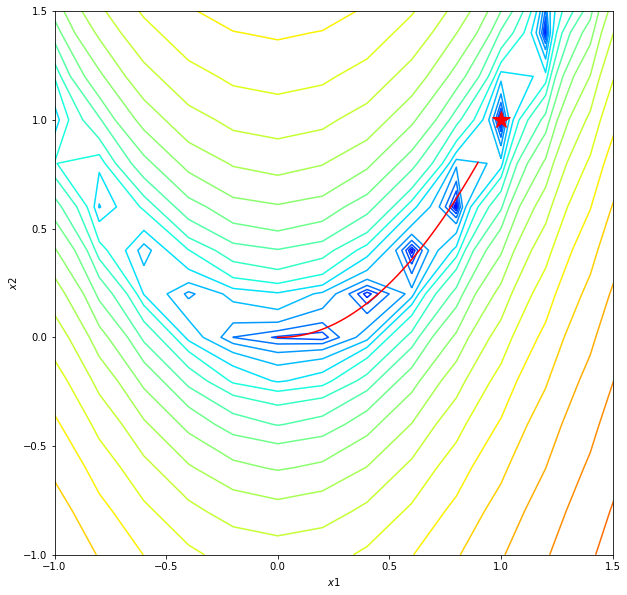

In [14]:
# learning rate
lr = 0.001
calcular(x1, x2, tol, passos, lr)